# Conjugate T

In [161]:
%matplotlib notebook

In [162]:
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt

In [163]:
rf.stylely()

C:\Users\JH218595\Documents\scikit-rf\skrf\plotting.py:1411: UserWarning: Style includes a parameter, 'interactive', that is not related to style.  Ignoring
  mpl.style.use(os.path.join(pwd, style_file))


## Real Impedance

In [246]:
def conj_T(R, Rm=2, Zm=3, Z0=3):
    X1 = np.sqrt(2*Rm*Zm - Rm**2)
    X2 = -X1
    
    Z1 = R + 1j*X1
    Z2 = R + 1j*X2

    freq = rf.Frequency(50, unit='MHz', npoints=1)
    tl = rf.DefinedGammaZ0(freq)
    z1 = tl.resistor(Z1, name='Z1')
    z2 = tl.resistor(Z2, name='Z2')

    port1 = rf.Circuit.Port(freq, name='Port1')
    gnd1 = rf.Circuit.Ground(freq, name='gnd1', z0=z1.z0)
    gnd2 = rf.Circuit.Ground(freq, name='gnd2', z0=z2.z0)

    cnx = [
        [(port1, 0), (z1, 0), (z2, 0)],
        [(z1, 1), (gnd1, 0)],
        [(z2, 1), (gnd2, 0)]
    ]
    cir = rf.Circuit(cnx)
    return cir.network


In [411]:
Rs = np.linspace(0.1, 20, num=201)
Z0 = 5
Zm = 5
Rm = 1.5

In [412]:
2*Z0/Rm - 1

5.666666666666667

In [413]:
Xm = np.sqrt(2*Zm*Rm - Rm**2)
Zm/Xm

1.4002800840280096

In [414]:
np.sqrt(Zm/(2*Rm))

1.2909944487358056

In [415]:
cts = [conj_T(R=R, Z0=Z0, Rm=Rm, Zm=Zm) for R in Rs]
zs = np.array([ct.z.squeeze() for ct in cts])
swr = np.array([z/Zm if z>Zm else Zm/z  for z in zs])

<IPython.core.display.Javascript object>


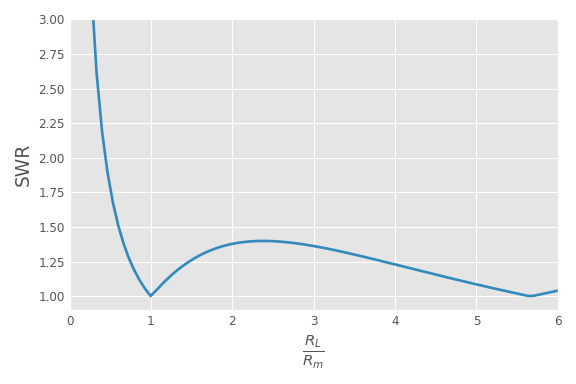

In [420]:
fig, ax = plt.subplots()
ax.plot(Rs/Rm, swr.real, lw=2)
ax.set_xlabel(r'$\frac{R_L}{R_m}$', fontsize=16)
ax.set_ylabel('SWR', fontsize=14)
ax.set_ylim(.9, 3)
ax.set_xlim(0, 6)
fig.tight_layout()
fig.savefig('ConjugateT_VSWR.png', dpi=150)

# Simple impedance

In [417]:

def imp(ZL, Z0=30):
    
    freq = rf.Frequency(50, unit='MHz', npoints=1)
    tl = rf.DefinedGammaZ0(freq, z0=Z0)
    zl = tl.resistor(ZL, name='ZL')
    
    port1 = rf.Circuit.Port(freq, name='Port1', z0=Z0)
    gnd1 = rf.Circuit.Ground(freq, name='gnd1', z0=Z0)
    
    cnx = [
        [(port1, 0), (zl, 0)],
        [(zl, 1), (gnd1, 0)]
    ]
    cir = rf.Circuit(cnx)
    return cir.network

In [418]:
Z0 = 2
imp(3, Z0).z/Z0

array([[[1.5+0.j]]])

In [173]:
3/2

1.5